<a href="https://colab.research.google.com/github/MaxenceAr/Regression-Polynomiale-et-SVM/blob/main/Regression_lin%C3%A9aire_pour_des_donn%C3%A9es_non_s%C3%A9parable_lin%C3%A9airement(regPolynomiale_et_SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this exercice, we are not loading a dataset, but creating our own custom data consisting of a single feature. The target is built as a cubic polynomial on said feature. To make things a bit more challenging, we add some random fluctuations to the target

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = data_max - data_min
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * 0.3
target = data**3 - 0.5 * data**2 + noise

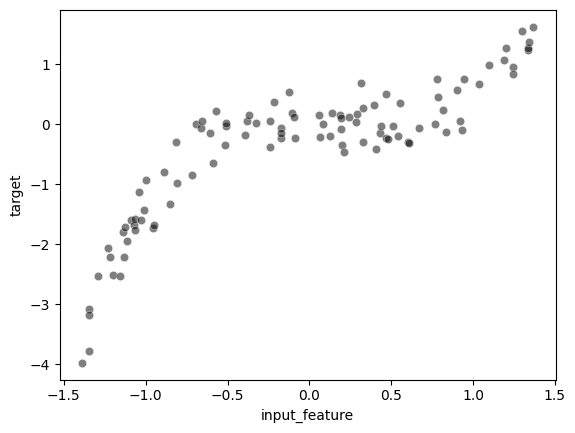

In [ ]:
import pandas as pd

full_data = pd.DataFrame({"input_feature": data, "target": target})
import seaborn as sns

_ = sns.scatterplot(
    data=full_data, x="input_feature", y="target", color="black", alpha=0.5
)

In [ ]:
rng.rand(n_sample)

array([0.20747008, 0.42468547, 0.37416998, 0.46357542, 0.27762871,
       0.58678435, 0.86385561, 0.11753186, 0.51737911, 0.13206811,
       0.71685968, 0.3960597 , 0.56542131, 0.18327984, 0.14484776,
       0.48805628, 0.35561274, 0.94043195, 0.76532525, 0.74866362,
       0.90371974, 0.08342244, 0.55219247, 0.58447607, 0.96193638,
       0.29214753, 0.24082878, 0.10029394, 0.01642963, 0.92952932,
       0.66991655, 0.78515291, 0.28173011, 0.58641017, 0.06395527,
       0.4856276 , 0.97749514, 0.87650525, 0.33815895, 0.96157015,
       0.23170163, 0.94931882, 0.9413777 , 0.79920259, 0.63044794,
       0.87428797, 0.29302028, 0.84894356, 0.61787669, 0.01323686,
       0.34723352, 0.14814086, 0.98182939, 0.47837031, 0.49739137,
       0.63947252, 0.36858461, 0.13690027, 0.82211773, 0.18984791,
       0.51131898, 0.22431703, 0.09784448, 0.86219152, 0.97291949,
       0.96083466, 0.9065555 , 0.77404733, 0.33314515, 0.08110139,
       0.40724117, 0.23223414, 0.13248763, 0.05342718, 0.72559

In scikit-learn, by convention data (also called X in the scikit-learn documentation) should be a 2D matrix of shape (n_samples, n_features). If data is a 1D vector, you need to reshape it into a matrix with a single column if the vector represents a feature or a single row if the vector represents a sample.

In [ ]:
print(data)

[-1.38685267 -1.34738856 -1.34369887 -1.34338849 -1.29027418 -1.23136868
 -1.22038701 -1.20109904 -1.15603796 -1.13696657 -1.13092446 -1.12811643
 -1.11427453 -1.0909496  -1.06883161 -1.06756239 -1.06344963 -1.03900637
 -1.03096599 -1.01308774 -0.9986108  -0.95488517 -0.94833335 -0.88706419
 -0.84956939 -0.81514508 -0.81092883 -0.71560834 -0.69078351 -0.65924429
 -0.65690943 -0.6081405  -0.58966294 -0.57080745 -0.51680062 -0.5096471
 -0.50800693 -0.39337788 -0.38160984 -0.36756952 -0.32636375 -0.24006362
 -0.23894657 -0.21376656 -0.17631053 -0.17475581 -0.17191576 -0.12277907
 -0.10785779 -0.09432984 -0.08777664  0.0611753   0.06509455  0.08090578
  0.12567291  0.13667781  0.18648407  0.19052477  0.19161506  0.19655096
  0.21265019  0.24223622  0.28773745  0.29356746  0.31386802  0.32741519
  0.32937939  0.39177886  0.40850352  0.42870331  0.43772285  0.4669468
  0.46874906  0.47778603  0.50909684  0.53892193  0.55336735  0.60253023
  0.60571617  0.66993802  0.76785433  0.7788389   0.7

In [ ]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [ ]:
def fit_score_plot_regression(model, title):
    model.fit(data, target)
    target_predicted = model.predict(data)
    mse = mean_squared_error(target, target_predicted)
    ax = sns.scatterplot(
        data=full_data, x="input_feature", y="target", color="black", alpha=0.5
    )
    ax.plot(data, target_predicted)
    if title is not None:
        _ = ax.set_title(title + f" (MSE = {mse:.2f})")
    else:
        _ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [ ]:
modelreg=LinearRegression()

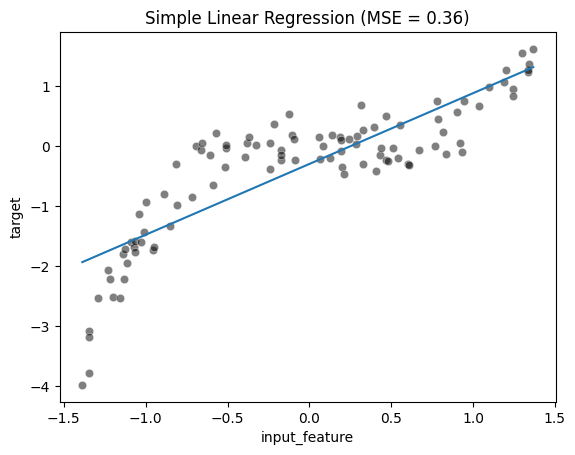

In [ ]:
fit_score_plot_regression(modelreg,"Simple Linear Regression")

In [ ]:
modelreg.coef_

array([1.18093705])

In [ ]:
modelreg.intercept_

-0.294274297169386

La syntaxe à suivre pour une regression polynomiale est la suivante : (on transforme les données (chaque colonne est après transformation disponible à toutes les puissances souhaitées). Puis on fait une regression linéaire avec ces différentes colonnes.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),LinearRegression())
polynomial_regression

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

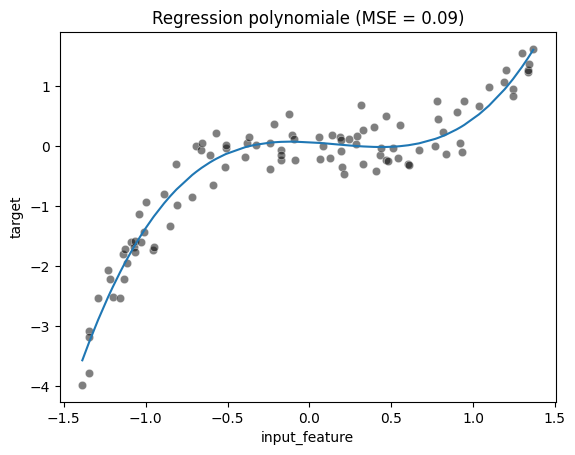

In [ ]:
fit_score_plot_regression(polynomial_regression,"Regression polynomiale")

As we have just seen, when data are not linear seperable, we wan transform data into polynomes. And then combine this polynomes whith linear regression.
Adding polynomial features is simple to implement and can work great with all sorts of
machine learning algorithms. That said, at a low polynomial degree this
method cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.


Fortunately, when using SVMs you can apply an almost miraculous mathematical technique
called the kernel trick. The kernel trick makes it
possible to get the same result as if you had added many polynomial features, even with a
very high degree, without actually having to add them. This means there’s no combinatorial
explosion of the number of features. However, SVMs don't deal well with dataset with a lt of rows.

To resume, SVMs don't deal well with datasets with a lot of rows, and PolynomialRgression don't deal well with datasets with a lot of features.

SVR for regression problem
SVC for classification problem

In [ ]:
SVM = make_pipeline(StandardScaler(), SVR(degree=3))
SVM

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

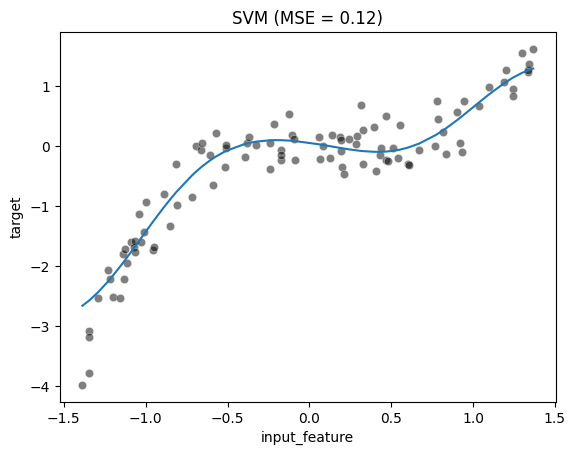

In [ ]:
fit_score_plot_regression(SVM,"SVM")